In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [2]:
data_path = './data/'
train_df = pd.read_csv(data_path + 'train.csv')
target = 'per_square_meter_price'

/home/orventro/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<AxesSubplot:xlabel='per_square_meter_price', ylabel='Count'>

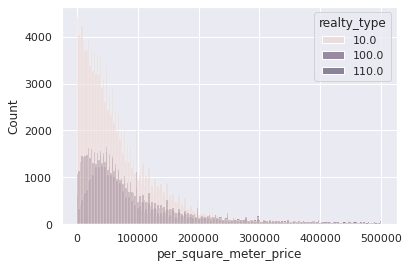

In [24]:
feat = 'realty_type'
df = train_df[[target, feat, 'price_type']].astype(float)
df = df[df[target] < 0.5e6]
sns.histplot(df, x=target, hue=feat)

In [ ]:
train_df['price_type'].unique()

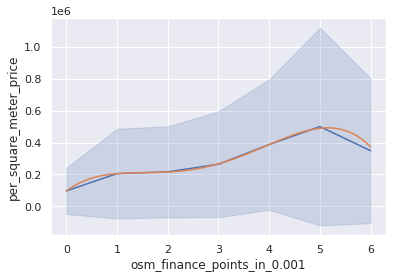

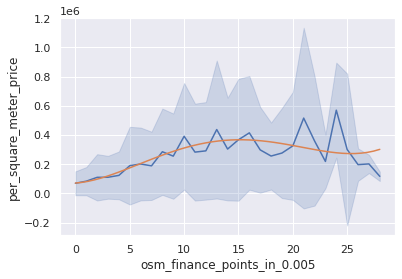

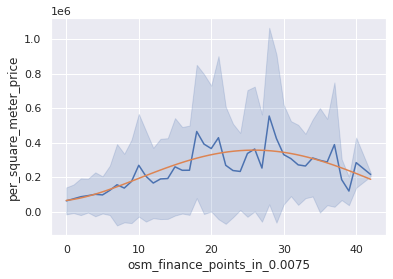

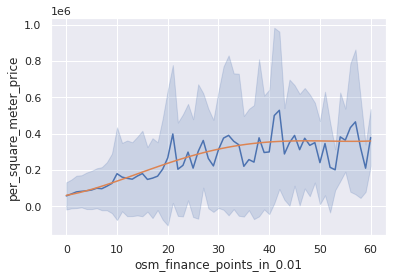

In [45]:
feats = ['osm_finance_points_in_0.001', 
         'osm_finance_points_in_0.005', 
         'osm_finance_points_in_0.0075', 
         'osm_finance_points_in_0.01']
df = train_df[[target] + feats].astype(float)

for i in range(4):
    sns.lineplot(x=feats[i], y=target, data=df, ci='sd')
    poly = np.polyfit(df[feats[i]], df[target], 4)
    x = np.linspace(df[feats[i]].min(), df[feats[i]].max())
    plt.plot(x, np.polyval(poly, x))
    plt.show()